## Import Dataset
* Read all the data files from previous seasons
* Keep only required columns
* Concatenate the data from the files together
* Import the concatenated data into a data frame

In [1]:
import pandas as pd
from glob import glob

req_cols = ['Date', 'HomeTeam', 'AwayTeam', 
            'HTHG', 'HTAG', 'HTR', 'FTHG', 'FTAG', 'FTR',
            'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 
            'HF', 'AF', 'HY', 'AY', 'HR', 'AR']
all_df = []
for file in glob('data/seasons/season*.csv'):
    print('reading', file)
    df = pd.read_csv(file, usecols=req_cols)
    df = df[req_cols]
    all_df.append(df)

concat_df = pd.concat(all_df, axis=0, sort=False)
concat_df.to_csv('data/all_seasons.csv', index=None)
print('All data read and saved.')
    
data = pd.read_csv('data/all_seasons.csv')
print(data.shape[0], 'matches')
data.head(5)

reading data/seasons/season-2004-2005.csv
reading data/seasons/season-2005-2006.csv
reading data/seasons/season-2013-2014.csv
reading data/seasons/season-2017-2018.csv
reading data/seasons/season-2012-2013.csv
reading data/seasons/season-2002-2003.csv
reading data/seasons/season-2007-2008.csv
reading data/seasons/season-2015-2016.csv
reading data/seasons/season-2003-2004.csv
reading data/seasons/season-2009-2010.csv
reading data/seasons/season-2014-2015.csv
reading data/seasons/season-2011-2012.csv
reading data/seasons/season-2008-2009.csv
reading data/seasons/season-2010-2011.csv
reading data/seasons/season-2006-2007.csv
reading data/seasons/season-2019-2020.csv
reading data/seasons/season-2016-2017.csv
reading data/seasons/season-2000-2001.csv
reading data/seasons/season-2018-2019.csv
reading data/seasons/season-2001-2002.csv
All data read and saved.
7430 matches


,Date,HomeTeam,AwayTeam,HTHG,HTAG,HTR,FTHG,FTAG,FTR,HS,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,14/08/04,Aston Villa,Southampton,2.0,0.0,H,2.0,0.0,H,14.0,...,5.0,2.0,12.0,6.0,14.0,9.0,0.0,0.0,0.0,0.0
1,14/08/04,Blackburn,West Brom,0.0,1.0,A,1.0,1.0,D,12.0,...,4.0,2.0,4.0,5.0,15.0,17.0,1.0,0.0,0.0,0.0
2,14/08/04,Bolton,Charlton,2.0,0.0,H,4.0,1.0,H,21.0,...,11.0,5.0,9.0,5.0,10.0,12.0,1.0,1.0,0.0,0.0
3,14/08/04,Man City,Fulham,1.0,0.0,H,1.0,1.0,D,12.0,...,5.0,2.0,9.0,4.0,14.0,12.0,0.0,2.0,0.0,0.0
4,14/08/04,Middlesbrough,Newcastle,0.0,1.0,A,2.0,2.0,D,15.0,...,8.0,4.0,6.0,7.0,16.0,13.0,3.0,1.0,0.0,0.0


### Obtain team names
* Read the current season's data file
* Obtain the list of home teams from the records
* Find the unique teams from the home teams list

In [2]:
curr_df = pd.read_csv('data/seasons/season-2019-2020.csv')

home_teams = curr_df['HomeTeam']

teams = []
for t in home_teams:
    if t not in teams:
        teams.append(t)
        
teams_df = pd.DataFrame(teams, columns=["Teams"])
display(teams_df)
teams_df.to_csv('data/teams.csv', index=None)

,Teams
0,Liverpool
1,West Ham
2,Bournemouth
3,Burnley
4,Crystal Palace
5,Watford
6,Tottenham
7,Leicester
8,Newcastle
9,Man United


## Data Analysis

### Inspect the columns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7430 entries, 0 to 7429
Data columns (total 21 columns):
Date        7429 non-null object
HomeTeam    7429 non-null object
AwayTeam    7429 non-null object
HTHG        7429 non-null float64
HTAG        7429 non-null float64
HTR         7429 non-null object
FTHG        7429 non-null float64
FTAG        7429 non-null float64
FTR         7429 non-null object
HS          7429 non-null float64
AS          7429 non-null float64
HST         7429 non-null float64
AST         7429 non-null float64
HC          7429 non-null float64
AC          7429 non-null float64
HF          7429 non-null float64
AF          7429 non-null float64
HY          7429 non-null float64
AY          7429 non-null float64
HR          7429 non-null float64
AR          7429 non-null float64
dtypes: float64(16), object(5)
memory usage: 1.2+ MB


### Home Team win rate

In [4]:
total_matches = data.shape[0]
print('Total matches:', total_matches)

total_home_wins = len(data[data['FTR'] == 'H'])
print('Total Home team wins:', total_home_wins)

home_wins_rate = (total_home_wins/total_matches)*100
print('Home wins rate: %.2f' % home_wins_rate,'%')

Total matches: 7430
Total Home team wins: 3449
Home wins rate: 46.42 %


### Team Statistics

In [5]:
def getData(team):
    print('\n______________', team, '______________\n')
    
    home_games = data[data['HomeTeam'] == team]
    away_games = data[data['AwayTeam'] == team]
    total_games = home_games.append(away_games)
    num_games = len(total_games.index)
    print('Total games played:', num_games)
    
    games_won = total_games[total_games['FTR'] == 'H']
    num_games_won = len(games_won.index)
    print('Total games won:', num_games_won)
    games_lost = total_games[total_games['FTR'] == 'A']
    num_games_lost = len(games_lost.index)
    print('Total games lost:', num_games_lost)
    games_drawn = total_games[total_games['FTR'] == 'D']
    num_games_drawn = len(games_drawn.index)
    print('Total games drawn:', num_games_drawn)
    
    games_won_rate = 0
    games_lost_rate = 0
    games_drawn_rate = 0
    if num_games != 0:
        games_won_rate = num_games_won / num_games
        print('Win percentage: %.2f' % (games_won_rate*100),'%')
        games_lost_rate = num_games_lost / num_games
        print('Lose percentage: %.2f' % (games_lost_rate*100),'%')
        games_drawn_rate = num_games_drawn / num_games
        print('Draw percentage: %.2f' % (games_drawn_rate*100),'%')
    
    home_goals = home_games['FTHG'].sum()
    away_goals = away_games['FTAG'].sum()
    total_goals = int(home_goals + away_goals)
    print('Total goals scored:', total_goals)
    
    home_goals_conc = home_games['FTAG'].sum()
    away_goals_conc = away_games['FTHG'].sum()
    total_goals_conc = int(home_goals_conc + away_goals_conc)
    print('Total goals conceded:', total_goals_conc)
    
    if num_games != 0:
        GPG = total_goals / num_games
        print('Goals scored per game: %.2f' % GPG)
        GCPG = total_goals_conc / num_games
        print('Goals conceded per game %.2f:' % GCPG)
    
    home_shots = home_games['HS'].sum()
    away_shots = away_games['AS'].sum()
    total_shots = int(home_shots + away_shots)
    print('Total shots hit:', total_shots)
    
    home_shots_ontarget = home_games['HST'].sum()
    away_shots_ontarget = away_games['AST'].sum()
    total_shots_ontarget = int(home_shots_ontarget + away_shots_ontarget)
    print('Total shots on target:', total_shots_ontarget)
    
    home_shots_against = home_games['AS'].sum()
    away_shots_against = away_games['HS'].sum()
    total_shots_against = int(home_shots_against + away_shots_against)
    print('Total shots allowed:', total_shots_against)
    
    if num_games != 0:
        HSPG = home_shots / num_games
        print('Shots taken per game: %.2f' % HSPG)
        ASPG = away_goals / num_games
        print('Shots allowed per game: %.2f' % ASPG)
    
    scoring_rate = 0
    if total_shots != 0:
        scoring_rate = (total_shots - total_goals) / total_shots
    print('Goal Scoring percentage: %2.f' % (scoring_rate*100),'%')
    
    home_yellow_cards = home_games['HY'].sum()
    away_yellow_cards = away_games['AY'].sum()
    total_yellow_cards = int(home_yellow_cards + away_yellow_cards)
    print('Total yellow cards received:', total_yellow_cards)
    
    home_red_cards = home_games['HR'].sum()
    away_red_cards = away_games['AR'].sum()
    total_red_cards = int(home_red_cards + away_red_cards)
    print('Total red cards received:', total_red_cards)
    
    home_fouls = home_games['HF'].sum()
    away_fouls = away_games['AF'].sum()
    total_fouls = int(home_fouls + away_fouls)
    print('Total fouls committed:', total_fouls)
    
    if num_games == 0: 
        games_won = 0
        games_lost = 0
        games_drawn = 0 
        total_goals = 0 
        total_shots_ontarget = 0 
        total_goals_conc = 0 
        total_yellow_cards = 0 
        total_red_cards = 0 
        total_fouls = 0 
        total_shots = 0 
        total_shots_against = 0 
        HSPG = 0 #HomeShotsPerGame 
        ASPG = 0 #AwayShotsPerGame 
        scoring_rate = 0 
        
    return [team, num_games, num_games_won, games_won_rate, num_games_lost, 
            num_games_drawn, total_goals, scoring_rate, total_goals_conc, 
            total_shots, total_shots_ontarget, total_shots_against, 
            total_fouls, total_yellow_cards, total_red_cards]

In [6]:
stat_list = []
for team in teams:
    stat = getData(team)
    stat_list.append(stat)
    
team_stats = pd.DataFrame(
    stat_list, 
    columns=['Team', 'Games', 'Wins', 'Win Rate', 'Losses', 'Draws', 
            'Goals scored', 'Scoring Rate', 'Goals Conceded', 
            'Shots', 'Shots on Target', 'Shots Against', 'Fouls', 
            'Yellow Cards', 'Red Cards'])


______________ Liverpool ______________

Total games played: 742
Total games won: 352
Total games lost: 210
Total games drawn: 180
Win percentage: 47.44 %
Lose percentage: 28.30 %
Draw percentage: 24.26 %
Total goals scored: 1318
Total goals conceded: 721
Goals scored per game: 1.78
Goals conceded per game 0.97:
Total shots hit: 11152
Total shots on target: 5234
Total shots allowed: 6583
Shots taken per game: 8.55
Shots allowed per game: 0.77
Goal Scoring percentage: 88 %
Total yellow cards received: 980
Total red cards received: 44
Total fouls committed: 7991

______________ West Ham ______________

Total games played: 628
Total games won: 287
Total games lost: 181
Total games drawn: 160
Win percentage: 45.70 %
Lose percentage: 28.82 %
Draw percentage: 25.48 %
Total goals scored: 762
Total goals conceded: 932
Goals scored per game: 1.21
Goals conceded per game 1.48:
Total shots hit: 7252
Total shots on target: 3189
Total shots allowed: 8669
Shots taken per game: 6.50
Shots allowed pe

Total shots hit: 2336
Total shots on target: 997
Total shots allowed: 3052
Shots taken per game: 6.27
Shots allowed per game: 0.39
Goal Scoring percentage: 90 %
Total yellow cards received: 319
Total red cards received: 11
Total fouls committed: 2347

______________ Southampton ______________

Total games played: 477
Total games won: 209
Total games lost: 130
Total games drawn: 138
Win percentage: 43.82 %
Lose percentage: 27.25 %
Draw percentage: 28.93 %
Total goals scored: 582
Total goals conceded: 646
Goals scored per game: 1.22
Goals conceded per game 1.35:
Total shots hit: 5838
Total shots on target: 2368
Total shots allowed: 5680
Shots taken per game: 6.76
Shots allowed per game: 0.51
Goal Scoring percentage: 90 %
Total yellow cards received: 668
Total red cards received: 35
Total fouls committed: 5718

______________ Man City ______________

Total games played: 705
Total games won: 342
Total games lost: 219
Total games drawn: 144
Win percentage: 48.51 %
Lose percentage: 31.06 %
D

In [7]:
display(team_stats)
team_stats.to_csv('data/team_stats.csv')

,Team,Games,Wins,Win Rate,Losses,Draws,Goals scored,Scoring Rate,Goals Conceded,Shots,Shots on Target,Shots Against,Fouls,Yellow Cards,Red Cards
0,Liverpool,742,352,0.474394,210,180,1318,0.881815,721,11152,5234,6583,7991,980,44
1,West Ham,628,287,0.457006,181,160,762,0.894926,932,7252,3189,8669,7289,1097,47
2,Bournemouth,173,79,0.456647,53,41,221,0.891614,297,2039,694,2367,1606,261,7
3,Burnley,211,102,0.483412,62,47,214,0.901654,331,2176,783,3305,2220,363,7
4,Crystal Palace,287,115,0.400697,106,66,325,0.900642,406,3271,1119,3940,3429,474,13
5,Watford,211,98,0.464455,61,52,222,0.904475,334,2324,801,2711,2655,391,21
6,Tottenham,743,368,0.495289,202,173,1161,0.885627,909,10151,4886,8407,8316,1124,55
7,Leicester,325,149,0.458462,93,83,432,0.881253,461,3638,1437,4156,3723,490,32
8,Newcastle,667,326,0.488756,174,167,835,0.892425,951,7762,3656,8140,7940,1035,67
9,Man United,743,353,0.475101,239,151,1398,0.870866,670,10826,5365,7646,8317,1136,48


### Goal Scoring analysis

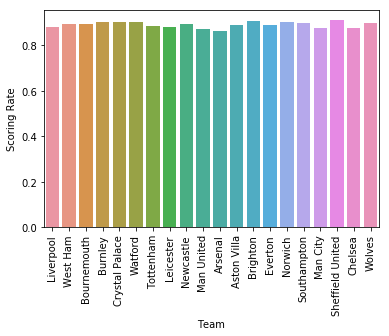

In [8]:
import seaborn as sns

GS = sns.barplot(team_stats['Team'], team_stats['Scoring Rate'])
for item in GS.get_xticklabels():
    item.set_rotation(90)

### Win Analysis

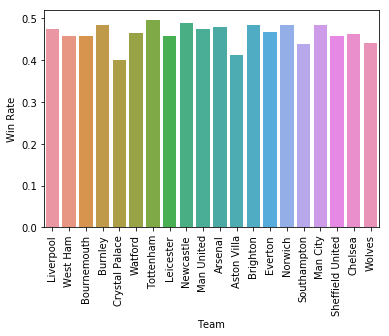

In [9]:
WR = sns.barplot(team_stats['Team'], team_stats['Win Rate'])
for item in WR.get_xticklabels():
    item.set_rotation(90)

### Goals and Shots analysis

<Figure size 432x288 with 0 Axes>

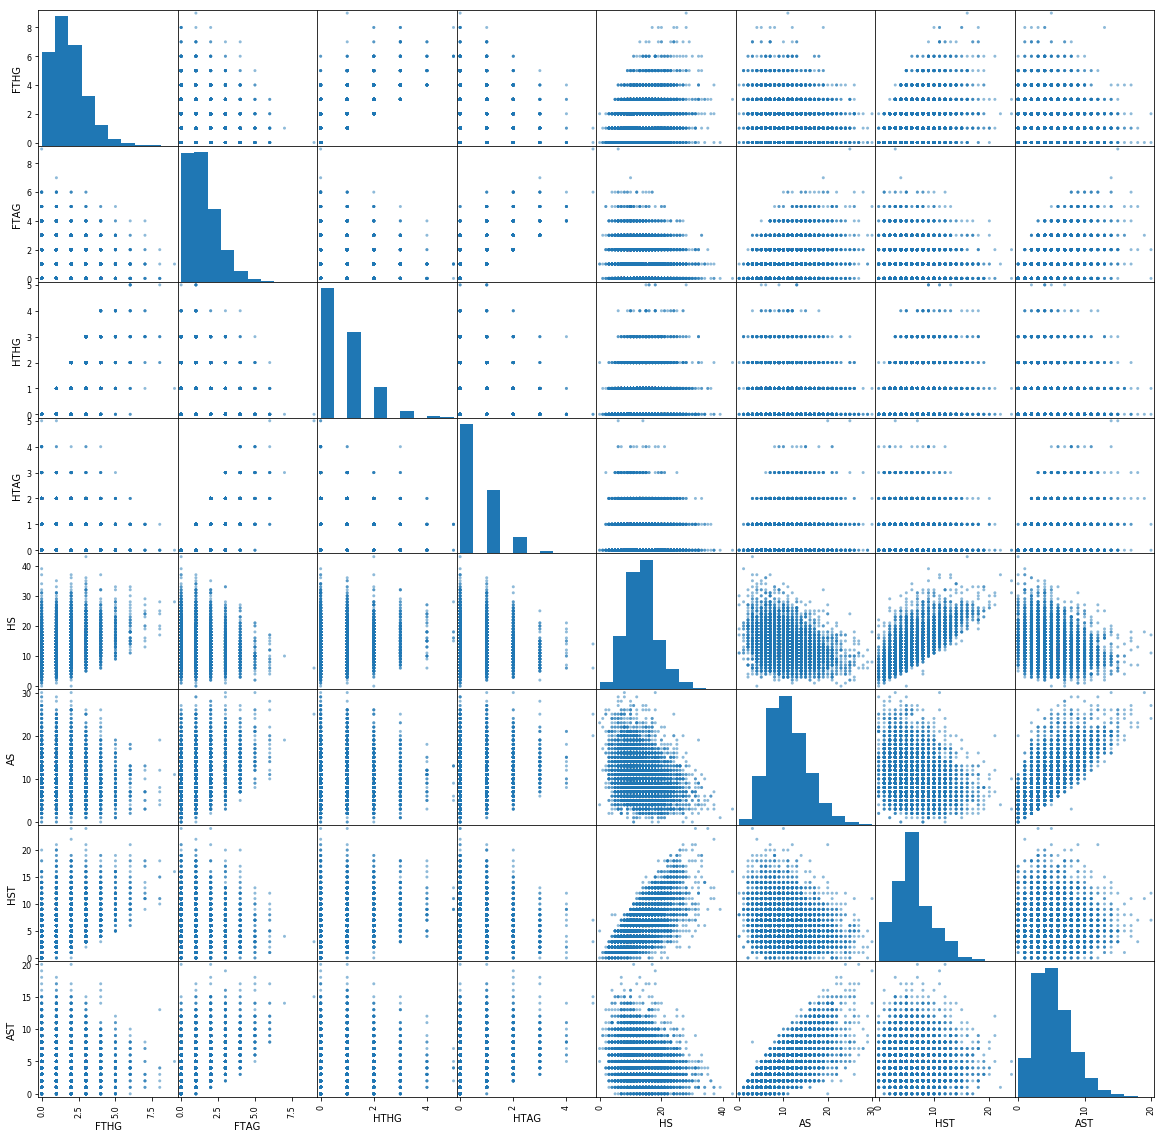

In [10]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

plt.figure()
scatter_matrix(data[['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST']], 
               figsize=(20,20))
plt.show()